In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

In [4]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.shape

(3166, 21)

In [8]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])

In [11]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [12]:
d1 = df['label'].value_counts()
d1

1    1583
0    1583
Name: label, dtype: int64

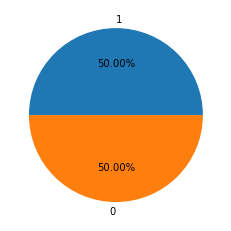

In [13]:
plt.pie(x=d1, labels=d1.index, autopct='%.2f%%')
plt.show()

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
print(x.shape)
print(y.shape)

(3166, 20)
(3166,)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2532, 20)
(634, 20)
(2532,)
(634,)


In [18]:
def gen_cls_metrics(ytest,ypred):
    print('Accuracy Score', accuracy_score(ytest,ypred))
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

def train_test_score(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

### 1)Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
m1 = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=12)
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=12)

In [23]:
train_test_score(m1)

Training Score 0.995260663507109
Testing Score 0.9605678233438486


In [25]:
ypred_m1 = m1.predict(x_test)

In [27]:
gen_cls_metrics(y_test,ypred_m1)

Accuracy Score 0.9605678233438486
[[304  12]
 [ 13 305]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       316
           1       0.96      0.96      0.96       318

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



### 2)Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
m2 = RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=10,min_samples_split=15)
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=15,
                       n_estimators=80)

In [30]:
train_test_score(m2)

Training Score 0.9940758293838863
Testing Score 0.9700315457413249


In [31]:
ypred_m2 = m2.predict(x_test)

In [32]:
gen_cls_metrics(y_test,ypred_m2)

Accuracy Score 0.9700315457413249
[[309   7]
 [ 12 306]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       316
           1       0.98      0.96      0.97       318

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



### 3)KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
m3 = KNeighborsClassifier(n_neighbors=40)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [56]:
train_test_score(m3)

Training Score 0.7109004739336493
Testing Score 0.7050473186119873


In [57]:
ypred_m3 = m3.predict(x_test)

In [58]:
gen_cls_metrics(y_test,ypred_m3)

Accuracy Score 0.7050473186119873
[[223  93]
 [ 94 224]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       316
           1       0.71      0.70      0.71       318

    accuracy                           0.71       634
   macro avg       0.71      0.71      0.71       634
weighted avg       0.71      0.71      0.71       634



### 4)Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [75]:
m4 = LogisticRegression(max_iter=1000)
m4.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [76]:
train_test_score(m4)

Training Score 0.909952606635071
Testing Score 0.9116719242902208


In [77]:
ypred_m4 = m4.predict(x_test)

In [78]:
gen_cls_metrics(y_test,ypred_m4)

Accuracy Score 0.9116719242902208
[[272  44]
 [ 12 306]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       316
           1       0.87      0.96      0.92       318

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634



### 5)SVM Classifier

In [79]:
from sklearn.svm import SVC

In [80]:
m5 = SVC(kernel='linear',C=1)
m5.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [81]:
train_test_score(m5)

Training Score 0.9253554502369669
Testing Score 0.9274447949526814


In [82]:
ypred_m5 = m5.predict(x_test)

In [83]:
gen_cls_metrics(y_test,ypred_m5)

Accuracy Score 0.9274447949526814
[[278  38]
 [  8 310]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       316
           1       0.89      0.97      0.93       318

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



### Best Model is:
The accuracies of the various models are:
1) Decision Tree - 96% <br>
2) Random Forest - 97% <br>
3) KNN - 71% <br>
4) Logistic Regression - 91% <br>
5) SVM - 93% <br>
So from this, we can conclude that Random Forest Classifier(97%) is the model with the best accuracy.